In [186]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [187]:
df=pd.read_csv('inspectiondata.csv',parse_dates=['SALE_DT','REPORT_DT','REPAIR_DT'],keep_date_col = True)

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [188]:
df.head()

,id,KMS,SALE_DT,REPORT_DT,REPAIR_DT,MODEL,SUB_MODEL,CMPL_DESC,INVESTIGATION,ACTION_TAKEN,REG_NO
0,1,221928.0,2014-10-30,2017-10-22,2017-10-29,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155
1,2,221928.0,2014-10-30,2017-10-22,2017-10-29,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155
2,3,221928.0,2014-10-30,2017-10-22,2017-10-29,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155
3,4,185050.0,2014-02-28,2017-12-21,2017-12-21,3518TC-LPS,HCV-TRUCKS,DIFFERENTIAL NOISY.,AFTER INVESTIGATION WE ARE FOUND THAT CROWN TA...,ALL JOB CARRIED OUT UNDER WARRANTY.,NL01L2162
4,5,185050.0,2014-02-28,2017-12-21,2017-12-21,3518TC-LPS,HCV-TRUCKS,DIFFERENTIAL NOISY.,AFTER INVESTIGATION WE ARE FOUND THAT CROWN TA...,ALL JOB CARRIED OUT UNDER WARRANTY.,NL01L2162


In [189]:
# Registration were found to to be duplicates
df=df.drop_duplicates('REG_NO') #since registration numbers are duplicated
df=df.reset_index()

In [190]:
# Q1. Make a statistical analysis ( count, mean, std dev, quartile etc) of the time diffference between the sales and the report dates over the entire data. Make a suitable histogram 
# representation, a distribution plot (a continuous curve depicting of the results), and a box plot of the results.

In [191]:
df['SALE_DT']

0       2014-10-30
1       2014-02-28
2       2014-08-29
3       2015-08-25
4       2014-11-14
           ...    
49380   2017-07-31
49381   2017-08-31
49382   2017-09-30
49383   2016-06-30
49384   2017-12-31
Name: SALE_DT, Length: 49385, dtype: datetime64[ns]

In [192]:
#Time diffference between the sales and the report dates over the entire data

In [193]:
df['diff'] = df['REPORT_DT'] - df['SALE_DT']

In [194]:
df.head()

,index,id,KMS,SALE_DT,REPORT_DT,REPAIR_DT,MODEL,SUB_MODEL,CMPL_DESC,INVESTIGATION,ACTION_TAKEN,REG_NO,diff
0,0,1,221928.0,2014-10-30,2017-10-22,2017-10-29,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155,1088 days
1,3,4,185050.0,2014-02-28,2017-12-21,2017-12-21,3518TC-LPS,HCV-TRUCKS,DIFFERENTIAL NOISY.,AFTER INVESTIGATION WE ARE FOUND THAT CROWN TA...,ALL JOB CARRIED OUT UNDER WARRANTY.,NL01L2162,1392 days
2,11,12,217890.0,2014-08-29,2017-12-21,2017-12-21,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS BRAKEDOWN WITH CAC COMPLAINT REAR ...,WE HAVE ATTEND THE VEHICLE ON SIDE FOUND THAT ...,REPLACED REAR AXLE TUBE UNDER WARRANTYDEFER.TX...,UP82T2306,1210 days
3,14,15,150723.0,2015-08-25,2017-12-13,2017-12-14,2518TC-LPT,HCV-TRUCKS,ASSY GEAR BOX NOISY,VEHICLE CAME IN OUR WORKSHOP ASSY GEAR BOX NOI...,REPLCED UNDER WARRANTYDEFER.TXT 0006,UP15CT2727,841 days
4,22,23,162639.0,2014-11-14,2017-12-18,2017-12-18,2518TC-LPT,HCV-TRUCKS,DIFFERENTIAL NOISY.,ON INVESTIGATION FOUND THE CROWN AND PINION TE...,AFFECTED PARTS REPLACED UNDER WARRANTY.DEFER.T...,MP20HB5022,1130 days


In [195]:
df['diff']=abs(df['diff'])

In [196]:
df.head()

,index,id,KMS,SALE_DT,REPORT_DT,REPAIR_DT,MODEL,SUB_MODEL,CMPL_DESC,INVESTIGATION,ACTION_TAKEN,REG_NO,diff
0,0,1,221928.0,2014-10-30,2017-10-22,2017-10-29,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155,1088 days
1,3,4,185050.0,2014-02-28,2017-12-21,2017-12-21,3518TC-LPS,HCV-TRUCKS,DIFFERENTIAL NOISY.,AFTER INVESTIGATION WE ARE FOUND THAT CROWN TA...,ALL JOB CARRIED OUT UNDER WARRANTY.,NL01L2162,1392 days
2,11,12,217890.0,2014-08-29,2017-12-21,2017-12-21,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS BRAKEDOWN WITH CAC COMPLAINT REAR ...,WE HAVE ATTEND THE VEHICLE ON SIDE FOUND THAT ...,REPLACED REAR AXLE TUBE UNDER WARRANTYDEFER.TX...,UP82T2306,1210 days
3,14,15,150723.0,2015-08-25,2017-12-13,2017-12-14,2518TC-LPT,HCV-TRUCKS,ASSY GEAR BOX NOISY,VEHICLE CAME IN OUR WORKSHOP ASSY GEAR BOX NOI...,REPLCED UNDER WARRANTYDEFER.TXT 0006,UP15CT2727,841 days
4,22,23,162639.0,2014-11-14,2017-12-18,2017-12-18,2518TC-LPT,HCV-TRUCKS,DIFFERENTIAL NOISY.,ON INVESTIGATION FOUND THE CROWN AND PINION TE...,AFFECTED PARTS REPLACED UNDER WARRANTY.DEFER.T...,MP20HB5022,1130 days


In [197]:
# Descriptive Analysis of Data

In [198]:
df['diff'].describe()

count                          47262
mean     995 days 20:05:12.606322208
std      271 days 20:48:58.345099928
min                  7 days 00:00:00
25%                808 days 00:00:00
50%                992 days 00:00:00
75%               1198 days 00:00:00
max               1792 days 00:00:00
Name: diff, dtype: object

In [199]:
df['diff'].isnull().value_counts()

False    47262
True      2123
Name: diff, dtype: int64

In [200]:
df['diff'].fillna(df['diff'].median(),inplace=True)

In [ ]:
x=df['diff'].dt.days

In [ ]:
x

0         1088
1         1088
2         1088
3         1392
4         1392
          ... 
605921    1202
605922    1303
605923    1429
605924     679
605925     892
Name: diff, Length: 605926, dtype: int64

In [ ]:
# Histogram

(array([   821.,   5912.,  17415.,  40310., 111277., 138386., 134473.,
        115504.,  38168.,   3660.]),
 array([   7. ,  185.5,  364. ,  542.5,  721. ,  899.5, 1078. , 1256.5,
        1435. , 1613.5, 1792. ]),
 <BarContainer object of 10 artists>)

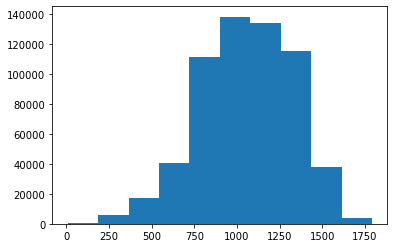

In [ ]:
plt.hist(x)

<AxesSubplot:>

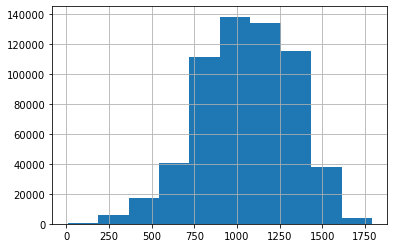

In [ ]:
x.hist()

In [ ]:
# Distributionplot

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff', ylabel='Density'>

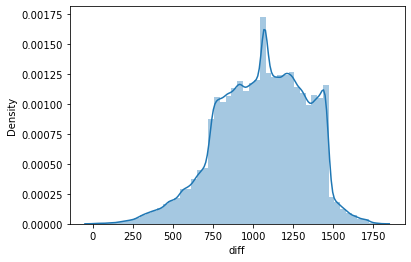

In [ ]:
sns.distplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x2046ae943d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2046ae94af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2046ae94040>],
 'medians': [<matplotlib.lines.Line2D at 0x2046ae9f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2046ae9f5e0>],
 'means': []}

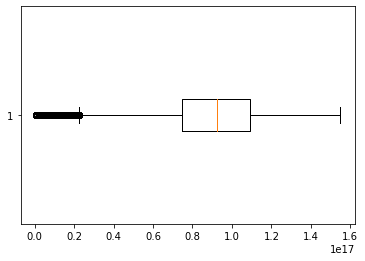

In [ ]:
plt.boxplot(df['diff'],vert=False)

In [ ]:
# 2. Make a statistical analysis of the time difference between the report and the repair dates over the entire data. Make a suitable histogram 
# representation, a distribution plot (a continuous curve depicting of the results), and a box plot of the results.

In [ ]:
df['diff2'] = abs(df['REPAIR_DT'] - df['REPORT_DT'])

In [ ]:
df['diff2'].isnull().value_counts()

False    593658
True      12268
Name: diff2, dtype: int64

In [ ]:
df['diff2'].fillna(df['diff2'].median(),inplace=True)

In [ ]:
df['diff2'].describe()

count                        605926
mean     30 days 22:14:34.063169430
std      61 days 00:35:28.059379673
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 2 days 00:00:00
75%                31 days 00:00:00
max               729 days 00:00:00
Name: diff2, dtype: object

In [ ]:
df['diff2'].isnull().value_counts()

False    605926
Name: diff2, dtype: int64

In [ ]:
y=abs(df['diff2'])

In [ ]:
y=y.dt.days

Histogram

<AxesSubplot:>

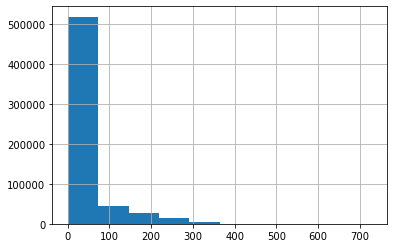

In [ ]:
y.hist()

In [ ]:
#Distribution Plot

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff2', ylabel='Density'>

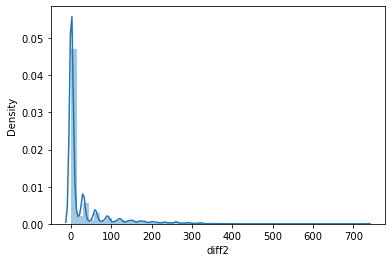

In [ ]:
sns.distplot(y)

In [ ]:
#Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x2046bcfe730>,
 'caps': [<matplotlib.lines.Line2D at 0x2046bcfe8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2046c6cd670>],
 'medians': [<matplotlib.lines.Line2D at 0x2046bcfeaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2046bd05130>],
 'means': []}

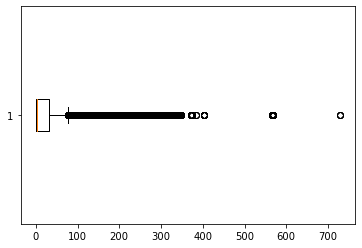

In [ ]:
plt.boxplot(y,vert=False)

In [ ]:
# 3. Make the analysis in Q1 and Q2 for the state "Maharashtra", Karnataka, and West Bengal. What are the salienet differences do you observe in the results of the 
# three states?

In [ ]:
df['REG_NO'].fillna(0,inplace=True) #0 inplace of null values

In [ ]:
df['STATEID'] = df['REG_NO'].str[0:2]

In [ ]:
df['STATEID']

0         HR
1         HR
2         HR
3         NL
4         NL
          ..
605921    RJ
605922    RJ
605923    NL
605924    RJ
605925    TS
Name: STATEID, Length: 605926, dtype: object

In [ ]:
df

,id,KMS,SALE_DT,REPORT_DT,REPAIR_DT,MODEL,SUB_MODEL,CMPL_DESC,INVESTIGATION,ACTION_TAKEN,REG_NO,diff,diff2,STATEID
0,1,221928.0,2014-10-30,2017-10-22,2017-10-29,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155,1088 days,7 days,HR
1,2,221928.0,2014-10-30,2017-10-22,2017-10-29,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155,1088 days,7 days,HR
2,3,221928.0,2014-10-30,2017-10-22,2017-10-29,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155,1088 days,7 days,HR
3,4,185050.0,2014-02-28,2017-12-21,2017-12-21,3518TC-LPS,HCV-TRUCKS,DIFFERENTIAL NOISY.,AFTER INVESTIGATION WE ARE FOUND THAT CROWN TA...,ALL JOB CARRIED OUT UNDER WARRANTY.,NL01L2162,1392 days,0 days,NL
4,5,185050.0,2014-02-28,2017-12-21,2017-12-21,3518TC-LPS,HCV-TRUCKS,DIFFERENTIAL NOISY.,AFTER INVESTIGATION WE ARE FOUND THAT CROWN TA...,ALL JOB CARRIED OUT UNDER WARRANTY.,NL01L2162,1392 days,0 days,NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605921,1172640,285610.0,2015-12-25,2019-04-10,2019-09-10,4018TC-LPS,NaN,ENGINE JAM AND NOISY,VEHICLE REPORT WITH COMPLAINT OF ENGINE JAM TH...,AFFECTED PARTS CHANGE - UNDER WARRANTY,RJ07GC1861,1202 days,153 days,RJ
605922,1172641,220125.0,2015-10-15,2019-05-10,2019-10-10,2518TC-LPT,NaN,HEOC PROBLEMAUTHORIZATION REQUEST NO-1-1232844...,SUBJECT VEHICLE REPORTED TO OUR WORKSHOP FOR H...,ASSY AND HEAD ASSY AFTER INVESTIGATION AND FOU...,RJ40GA0918,1303 days,153 days,RJ
605923,1172642,75894.0,2015-09-21,2019-08-20,2019-08-24,3118TC-LPT,NaN,GEAR BOX NOISY,THE CUSTOMER CALL US WITH COMPLAINT OF GEAR BO...,HENCE WE REPLACED THE UNDER WARRANTYDEFER.TXT ...,NL01N2106,1429 days,4 days,NL
605924,1172643,205596.0,2017-11-09,2019-09-19,2019-09-20,SIGNA4923.S,NaN,GEAR NOISY,GEAR OIL QUANTITY AND QUALITY FOUND OK. SYNCHR...,REPLACED U/WDEFER.TXT 0002,RJ02GB6624,679 days,1 days,RJ


In [ ]:
# create 3 dataframes for Maharashtra,WestBengal and Karnataka
dfmh=df[df['STATEID']=="MH"]
dfwb=df[df['STATEID']=="WB"] 
dfka=df[df['STATEID']=="KA"]

<AxesSubplot:>

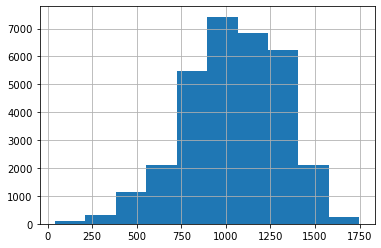

In [ ]:
(dfmh['diff']).dt.days.hist()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff', ylabel='Density'>

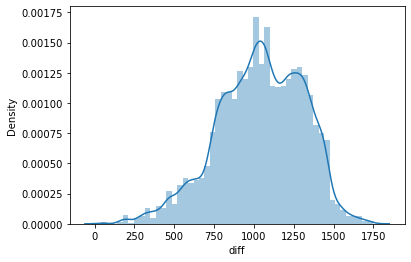

In [ ]:
sns.distplot(dfmh['diff'].dt.days)

{'whiskers': [<matplotlib.lines.Line2D at 0x2048512cd00>,
 'caps': [<matplotlib.lines.Line2D at 0x2048bd38460>,
 'boxes': [<matplotlib.lines.Line2D at 0x2048512c970>],
 'medians': [<matplotlib.lines.Line2D at 0x2048bd38b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2048bd38f10>],
 'means': []}

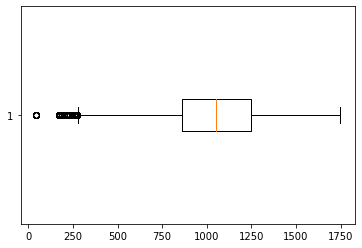

In [ ]:
plt.boxplot(dfmh['diff'].dt.days,vert=False)

<AxesSubplot:>

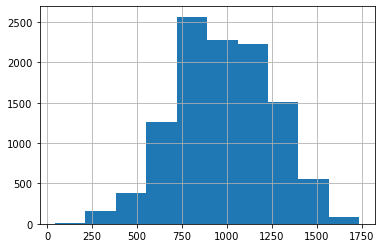

In [ ]:
(dfwb['diff']).dt.days.hist()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff', ylabel='Density'>

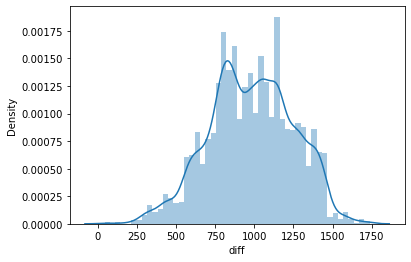

In [ ]:
sns.distplot(dfwb['diff'].dt.days)

{'whiskers': [<matplotlib.lines.Line2D at 0x2048a037250>,
 'caps': [<matplotlib.lines.Line2D at 0x2048a037910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2048a058e80>],
 'medians': [<matplotlib.lines.Line2D at 0x204855a2070>],
 'fliers': [<matplotlib.lines.Line2D at 0x204855a2400>],
 'means': []}

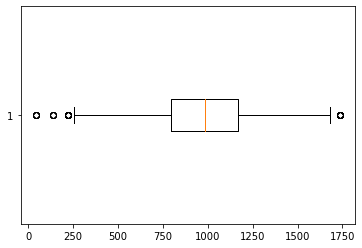

In [ ]:
plt.boxplot(dfwb['diff'].dt.days,vert=False)

<AxesSubplot:>

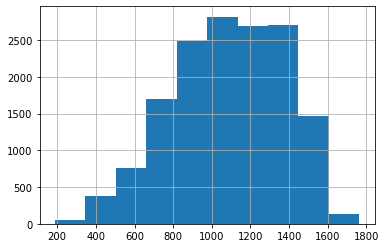

In [ ]:
(dfka['diff']).dt.days.hist()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff', ylabel='Density'>

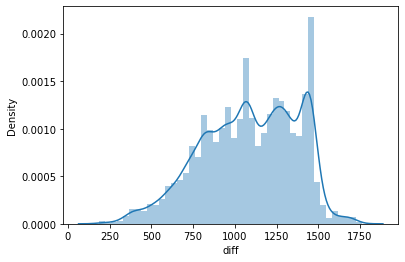

In [ ]:
sns.distplot(dfka['diff'].dt.days)

{'whiskers': [<matplotlib.lines.Line2D at 0x204844206d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20484420df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20484420340>],
 'medians': [<matplotlib.lines.Line2D at 0x20440b1e550>],
 'fliers': [<matplotlib.lines.Line2D at 0x20440b1e8e0>],
 'means': []}

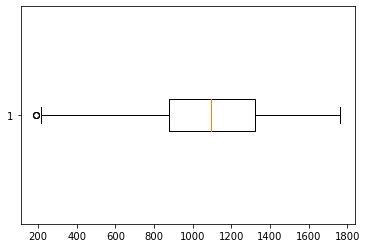

In [ ]:
plt.boxplot(dfka['diff'].dt.days,vert=False)

In [ ]:
dfmh['diff'].dt.days.describe()

count    31981.000000
mean      1039.813983
std        269.628108
min         41.000000
25%        859.000000
50%       1054.000000
75%       1247.000000
max       1748.000000
Name: diff, dtype: float64

In [ ]:
dfwb['diff'].dt.days.describe()

count    11038.000000
mean       979.211361
std        269.504885
min         42.000000
25%        794.000000
50%        982.000000
75%       1168.000000
max       1737.000000
Name: diff, dtype: float64

In [ ]:
dfka['diff'].dt.days.describe()

count    15180.000000
mean      1086.479578
std        284.280376
min        188.000000
25%        876.000000
50%       1095.000000
75%       1320.000000
max       1763.000000
Name: diff, dtype: float64

In [ ]:
# From all the above data we draw the following observations.Maharashtra  has the highest amount of datapoints.Here we see that minimum time diffrence of karnataka is much better than Maharashtra and West Bengal.Also mean of time diffrence in Karnataka is higher.
# This maybe an indicator that quality of cars sold in karnataka is better than other states as time since canr bought and it firts showed problem is higher here which is good.

<AxesSubplot:>

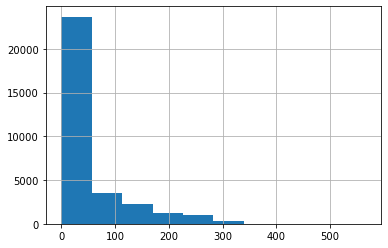

In [ ]:
(dfmh['diff2']).dt.days.hist()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff2', ylabel='Density'>

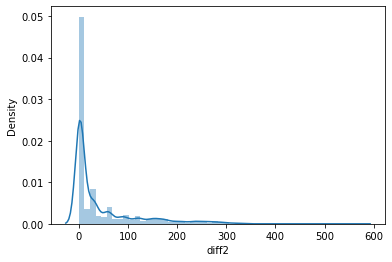

In [ ]:
sns.distplot(dfmh['diff2'].dt.days)

{'whiskers': [<matplotlib.lines.Line2D at 0x204819582b0>,
 'caps': [<matplotlib.lines.Line2D at 0x204819589d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2048127eee0>],
 'medians': [<matplotlib.lines.Line2D at 0x20483f64130>],
 'fliers': [<matplotlib.lines.Line2D at 0x20483f644c0>],
 'means': []}

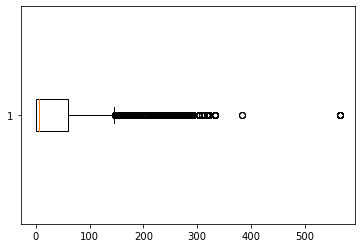

In [ ]:
plt.boxplot(dfmh['diff2'].dt.days,vert=False)

<AxesSubplot:>

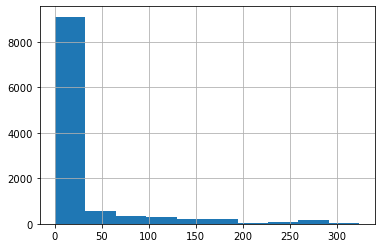

In [ ]:
(dfwb['diff2']).dt.days.hist()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff2', ylabel='Density'>

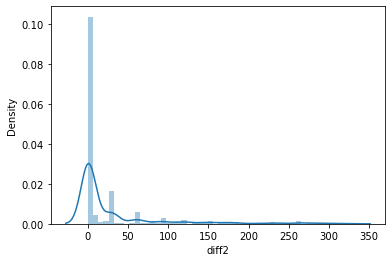

In [ ]:
sns.distplot(dfwb['diff2'].dt.days)

{'whiskers': [<matplotlib.lines.Line2D at 0x2048c4c58b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2048c4c5fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2048c4c5520>],
 'medians': [<matplotlib.lines.Line2D at 0x2048ad1b730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2048ad1bac0>],
 'means': []}

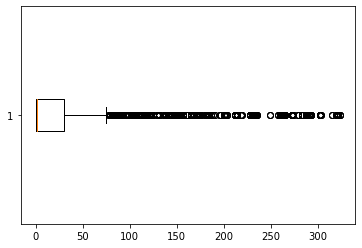

In [ ]:
plt.boxplot(dfwb['diff2'].dt.days,vert=False)

<AxesSubplot:>

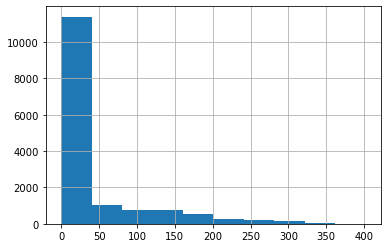

In [ ]:
(dfka['diff2']).dt.days.hist()

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diff2', ylabel='Density'>

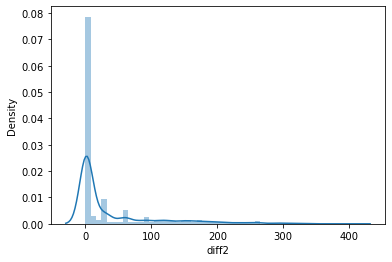

In [ ]:
sns.distplot(dfka['diff2'].dt.days)

{'whiskers': [<matplotlib.lines.Line2D at 0x2048b9ed6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2048b9eddc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2048b9ed310>],
 'medians': [<matplotlib.lines.Line2D at 0x2048b9ba520>],
 'fliers': [<matplotlib.lines.Line2D at 0x2048b9ba8b0>],
 'means': []}

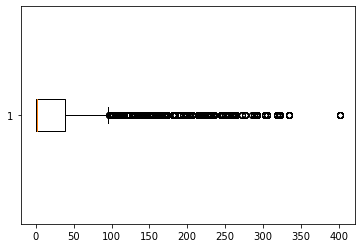

In [ ]:
plt.boxplot(dfka['diff2'].dt.days,vert=False)

In [204]:
dfmh['diff2'].dt.days.describe()

count    31981.000000
mean        43.847785
std         70.523033
min          0.000000
25%          1.000000
50%          6.000000
75%         59.000000
max        566.000000
Name: diff2, dtype: float64

In [203]:
dfwb['diff2'].dt.days.describe()

count    11038.000000
mean        27.636438
std         58.335428
min          0.000000
25%          0.000000
50%          1.000000
75%         30.000000
max        324.000000
Name: diff2, dtype: float64

In [202]:
dfka['diff2'].dt.days.describe()

count    15180.000000
mean        38.051383
std         67.952440
min          0.000000
25%          0.000000
50%          2.000000
75%         38.000000
max        402.000000
Name: diff2, dtype: float64

In [ ]:
# From all the above data we draw the following observations.Maharashtra has the highest amount of datapoints.Also mean between repair and problem report date is highest and also standard deviation and max values indicating the spread and range of data is huge there.
# This may me due to the fact that as there arew more number of reports in Maharashtra, so the repair time taken since reporting first started is more on average.

In [ ]:
# Also combined inference may be drwn as such.Maharashtra has a higher population thana that of Karnataka and West Bengal as per general knoiwledge.So number of vehicles is more.We observe 
# from the data above as no of  reports from Maharashtra is very high.Also Karnataka has the better quality vehicles sold as they develop problems later than the other 2 states.Maharashtra having a higher no 
# of reports showed us that the tiem period of problem solving since it first occured is more.This may happen due to queueing problem.


In [ ]:
# 4. How many unique types of vehicle  models are there in the data and what are their respective counts?

In [ ]:
df['MODEL'].nunique()

116

In [ ]:
df['MODEL'].value_counts()

4018TC-LPS         173209
3118TC-LPT         107161
2518TC-LPT          65132
3718TC-LPT-10X2     35645
2518TC-LPK          32506
                    ...  
1615TC -LPK             3
1615TCLPK               3
PRIMA2528               2
PRIMA-3128K             2
1212TC-SA-4X4           2
Name: MODEL, Length: 116, dtype: int64

In [ ]:
# 5. How many unique types of vehicles are there in the dataset and what are their respective counts?

In [ ]:
df['SUB_MODEL'].nunique()

41

In [ ]:
df['SUB_MODEL'].value_counts()

HCV-TRUCKS           90890
HCV                  14983
4018TC-LPS           14589
3118TC-LPT            8028
MCV-TRUCKS            5574
2518TC-LPT            4716
2518TC-LPK            2308
4923TC-LPS-6X4        1975
3718TC-LPT-10X2       1641
1618TC-LPK            1212
2518TC-LPK-6X4        1148
2523TC-LPK-6X4         584
3518TC-LPS             523
1613-LPT               493
PRIMA-LX-4023S         408
2518TC-LPK-HD-6X4      364
3118TC-LPK             362
1615TC-LPT             334
MCV                    322
PRIMA-LX-4923S         163
PRIMA-LX-2523K         151
PRIMA-LX-3123K         111
3118TC-LPK-8X4         108
2518TC-LPTK            106
1613-LPK                92
2518TC-LPK-RMC          72
1613-SK                 56
3723TC-LPT              53
2523TC-LPK-HD-6X4       49
1613-SFC                41
PRIMA-LX-4028S          31
PRIMA-LX-2523T          21
MCV-TRUCK               17
PRIMA-LX-2528K          16
1613-SE                 14
PRIMA-LX-3123T          14
PRIMA-2528K             11
2

In [ ]:
# 6. How many types of "complaint descriptions" are there? What are their respective counts?

In [ ]:
df['CMPL_DESC'].nunique()

15333

In [ ]:
df['CMPL_DESC'].value_counts()

GEAR BOX NOISY                                      106506
GEAR BOX NOISY.                                      38368
DIFFERENTIAL NOISY                                   37044
DIFF NOISY                                           14464
DIFFERENTIAL NOISY.                                  11980
                                                     ...  
RR RHS SIDE AXLE SHAFT BROKEN                            1
Vehicle Reported with a complaint of Diff-Noisy.         1
REAR AXLE BEAM LEAKAGE                                   1
EAR AXLE OIL LEAKAGE                                     1
Engine oil leak                                          1
Name: CMPL_DESC, Length: 15333, dtype: int64

In [ ]:
# 7.Counting Frequency of Words in the Description

In [ ]:
df['CMPL_DESC'].str.split()

0         [VEHICLE, HAS, COME, WITH, COMPLAINT, OIL, LEA...
1         [VEHICLE, HAS, COME, WITH, COMPLAINT, OIL, LEA...
2         [VEHICLE, HAS, COME, WITH, COMPLAINT, OIL, LEA...
3                                    [DIFFERENTIAL, NOISY.]
4                                    [DIFFERENTIAL, NOISY.]
                                ...                        
605921                            [ENGINE, JAM, AND, NOISY]
605922    [HEOC, PROBLEMAUTHORIZATION, REQUEST, NO-1-123...
605923                                   [GEAR, BOX, NOISY]
605924                                        [GEAR, NOISY]
605925                                   [GEAR, BOX, NOISE]
Name: CMPL_DESC, Length: 605926, dtype: object

In [ ]:
df['CMPL_DESC'].str.split().explode()

0           VEHICLE
0               HAS
0              COME
0              WITH
0         COMPLAINT
            ...    
605924         GEAR
605924        NOISY
605925         GEAR
605925          BOX
605925        NOISE
Name: CMPL_DESC, Length: 2867732, dtype: object

In [ ]:
df['CMPL_DESC'].str.split().explode().value_counts()

GEAR                  334416
NOISY                 279916
BOX                   245516
NOISE                  89194
NOISY.                 87532
                       ...  
2.Exhuast                  1
NO.516202VY4C5072.         1
AVRAGE                     1
Work                       1
consumpon                  1
Name: CMPL_DESC, Length: 11974, dtype: int64

In [ ]:
df['CMPL_DESC'].str.split().explode().value_counts().head(10)

GEAR            334416
NOISY           279916
BOX             245516
NOISE            89194
NOISY.           87532
ENGINE           84975
DIFFERENTIAL     70995
AND              69457
FROM             55037
OIL              48628
Name: CMPL_DESC, dtype: int64